In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importar archivo 
df1 = pd.read_csv('supply.csv')

# Convertir la columna DATE a formato datetime
df1['DATE'] = pd.to_datetime(df1['DATE'])

# Reemplazar posibles comas por puntos y eliminar cualquier otro carácter no numérico
df1 = df1.replace({',': ''}, regex=True)

# Convertir las columnas numéricas a float, ignorando errores
for column in df1.columns:
    if column != 'DATE':  # No convertir la columna DATE
        df1[column] = pd.to_numeric(df1[column], errors='coerce')

# Eliminar filas con valores NaN resultantes de la conversión
df1 = df1.dropna()
#Quitar columna date para las Medidas Estadísticas Unidimensionales
df1_clean = df1.drop(columns=['DATE'])


df1.head()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
0,2003-01-01,129.321000,4.200000,1806.333333,421328.6667,14908.0
1,2003-01-04,131.756000,3.833333,1837.666667,429308.6667,15244.0
2,2003-01-07,135.013000,3.633333,1937.333333,458890.0000,15614.0
3,2003-01-10,138.835667,3.966667,1972.333333,491437.3333,15654.0
4,2004-01-01,143.298667,3.700000,1994.666667,506856.3333,15895.0


In [2]:
# Medidas Estadísticas Unidimensionales
mean = df1_clean.mean()
median = df1_clean.median()
mode = df1_clean.mode().iloc[0]
variance = df1_clean.var()
std_dev = df1_clean.std()
range_ = df1_clean.max() - df1_clean.min()

In [3]:
# Crear un DataFrame para mostrar los resultados
stats_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Mode': mode,
    'Variance': variance,
    'Standard Deviation': std_dev,
    'Range': range_
})

print("Medidas Estadísticas Unidimensionales:")
stats_df

Medidas Estadísticas Unidimensionales:


,Mean,Median,Mode,Variance,Standard Deviation,Range
CSUSHPISA,180.658712,172.270000,129.321000,1.714830e+03,41.410501,174.101667
MSACSR,6.137917,5.550000,4.800000,3.692932e+00,1.921700,8.000000
PERMIT,1309.350000,1277.333333,1455.333333,2.303236e+05,479.920372,1689.666666
TLRESCONS,490466.933330,489934.833300,246953.333300,3.142962e+10,177284.009540,700347.000000
EVACANTUSQ176N,17122.525000,17278.000000,16814.000000,1.886030e+06,1373.327964,5261.000000


In [4]:
# Matriz de correlación
corr_matrix = df1.corr()
print("\nMatriz de Correlación:")
corr_matrix


Matriz de Correlación:


,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
DATE,1.000000,0.741458,-0.022609,-0.129597,0.440010,-0.213582
CSUSHPISA,0.741458,1.000000,0.121782,0.382354,0.882204,-0.592952
MSACSR,-0.022609,0.121782,1.000000,-0.465049,-0.135552,0.441253
PERMIT,-0.129597,0.382354,-0.465049,1.000000,0.762928,-0.834793
TLRESCONS,0.440010,0.882204,-0.135552,0.762928,1.000000,-0.822951
EVACANTUSQ176N,-0.213582,-0.592952,0.441253,-0.834793,-0.822951,1.000000


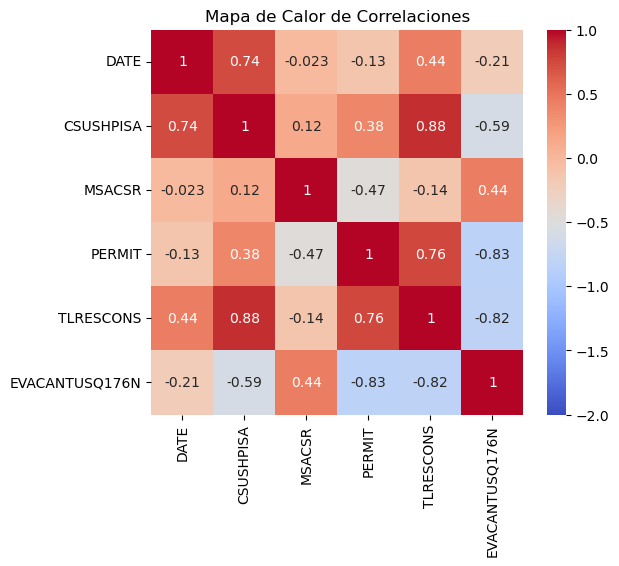

In [5]:
# Crea el mapa de calor 
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-2, vmax=1)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [6]:
# Calcular y mostrar la matriz de covarianza
cov_matrix = df1.cov()
print("\nMatriz de Covarianza:")
cov_matrix


Matriz de Covarianza:


,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
DATE,3.353335e+34,5.622582e+18,-7.956292e+15,-1.138948e+19,1.428468e+22,-5.371287e+19
CSUSHPISA,5.622582e+18,1.714830e+03,9.691200e+00,7.598801e+03,6.476632e+06,-3.372127e+04
MSACSR,-7.956292e+15,9.691200e+00,3.692932e+00,-4.288973e+02,-4.618068e+04,1.164522e+03
PERMIT,-1.138948e+19,7.598801e+03,-4.288973e+02,2.303236e+05,6.491160e+07,-5.502023e+05
TLRESCONS,1.428468e+22,6.476632e+06,-4.618068e+04,6.491160e+07,3.142962e+10,-2.003632e+08
EVACANTUSQ176N,-5.371287e+19,-3.372127e+04,1.164522e+03,-5.502023e+05,-2.003632e+08,1.886030e+06
